
![iris image][images/iris_virginica.jpg]

# Analyzing Employee Performance and Retention

## Overview

## Data Understanding

## CRISP-DM Headers

## Data Preparation

## Data Cleaning / Processing

## Analysis / Recommendations

## Conclusion

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load in data
# Using Employee_ID as index

emp_df = pd.read_csv("data/emp_perf.csv", index_col=0, parse_dates=["Hire_Date"])
emp_df.head()

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
Employee_ID,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [37]:
emp_df.head()

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
Employee_ID,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [38]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Department                   100000 non-null  object        
 1   Gender                       100000 non-null  object        
 2   Age                          100000 non-null  int64         
 3   Job_Title                    100000 non-null  object        
 4   Hire_Date                    100000 non-null  datetime64[ns]
 5   Years_At_Company             100000 non-null  int64         
 6   Education_Level              99463 non-null   object        
 7   Performance_Score            100000 non-null  int64         
 8   Monthly_Salary               99000 non-null   float64       
 9   Work_Hours_Per_Week          100000 non-null  int64         
 10  Projects_Handled             100000 non-null  int64         
 11  Overtime_Hours               10

### What are we seeing from this info?
- 100,000 rows, 19 columns
- Have some null values in Education_Level and Monthly_Salary
- Have some mismatched datatypes, datatimes (which was handled with pd.read_csv())
- Want to explore object columns with value_counts()

In [39]:
emp_df.describe()

,Age,Hire_Date,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000,100000.000000,100000.000000,99000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,2019-09-15 06:20:20.916036096,4.476070,2.995430,6402.446970,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
min,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,2017-03-20 08:03:05.556036096,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,41.000000,2019-09-21 08:03:05.556036096,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,51.000000,2022-03-14 08:03:05.556036096,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,11.244121,NaN,2.869336,1.414726,1372.643449,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719


### What are we seeing from this info?
- There are a few datapoints that might be considered outliers when looking at columns like Training_Hours, Sick_Days, and Projects_Handled

In [40]:
emp_df.describe(include=["object"])

,Department,Gender,Job_Title,Education_Level
count,100000,100000,100000,99463
unique,9,3,7,4
top,Marketing,Male,Specialist,Bachelor
freq,11216,48031,14507,49763


### Wht are we seeing from this info?
- Marketing is the top department
- The most popular job title is "Specialist"
- Most frequent education level is Bachelor's degree

In [41]:
# grabbing list of all numerical cols

num_cols = list(emp_df.select_dtypes(include=["number"]).columns)
num_cols

['Age',
 'Years_At_Company',
 'Performance_Score',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Projects_Handled',
 'Overtime_Hours',
 'Sick_Days',
 'Remote_Work_Frequency',
 'Team_Size',
 'Training_Hours',
 'Promotions',
 'Employee_Satisfaction_Score']

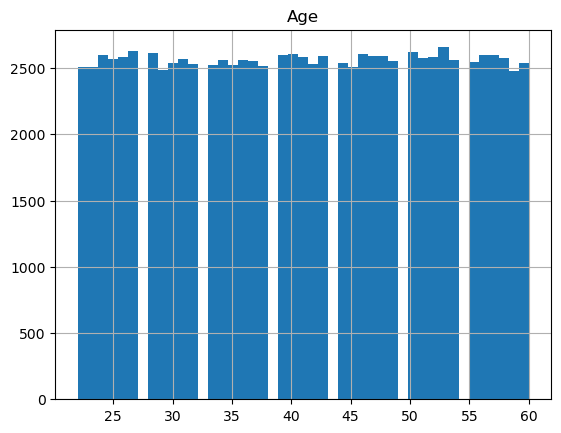

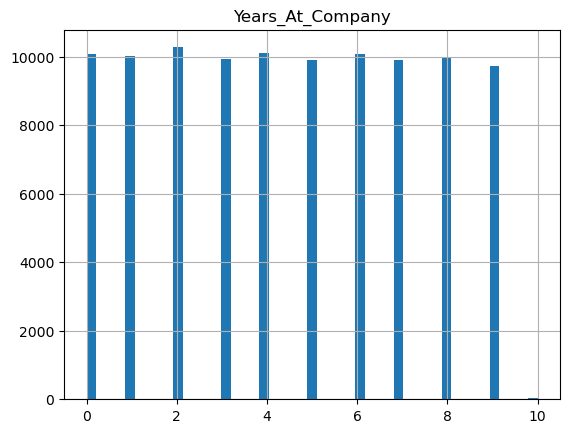

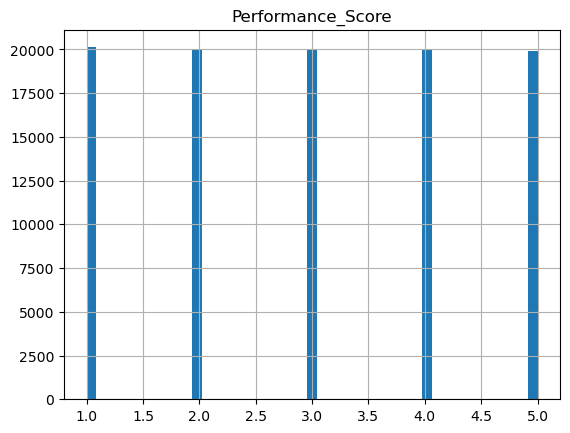

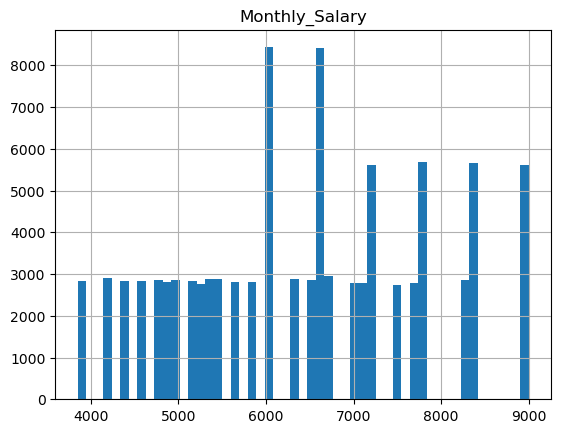

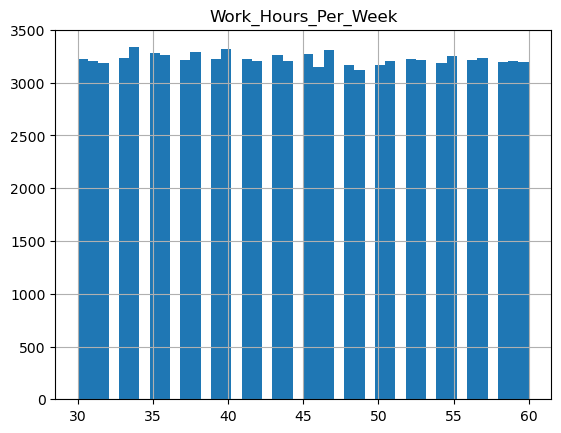

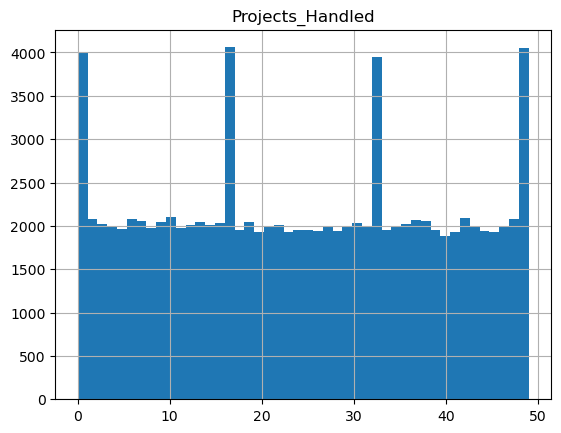

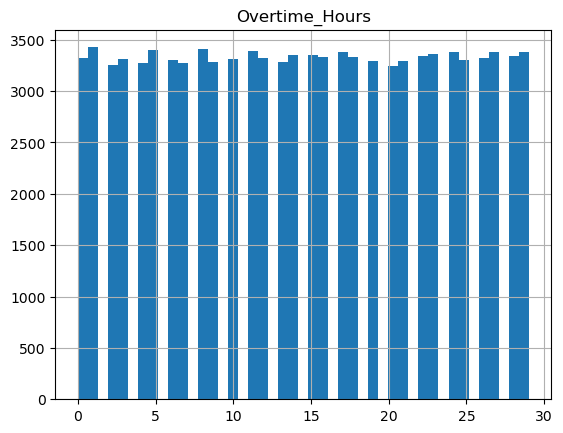

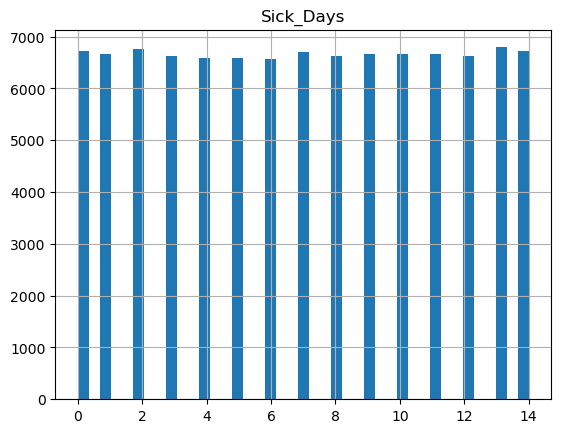

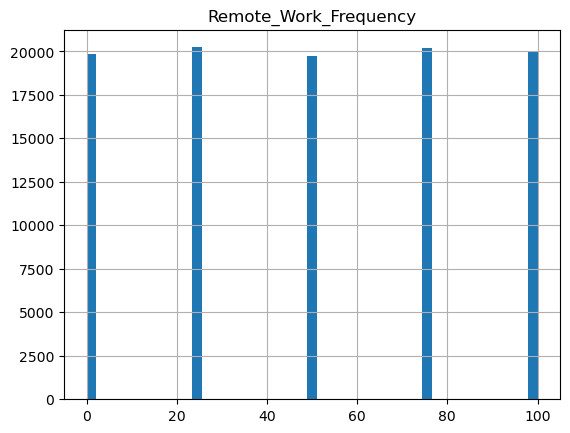

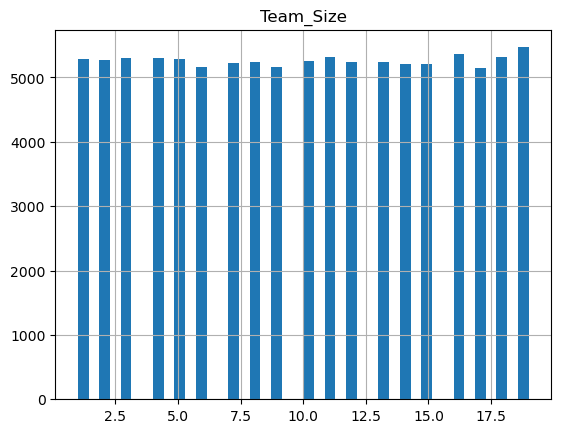

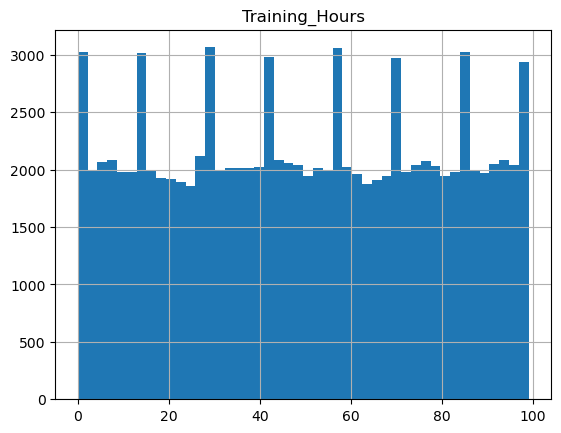

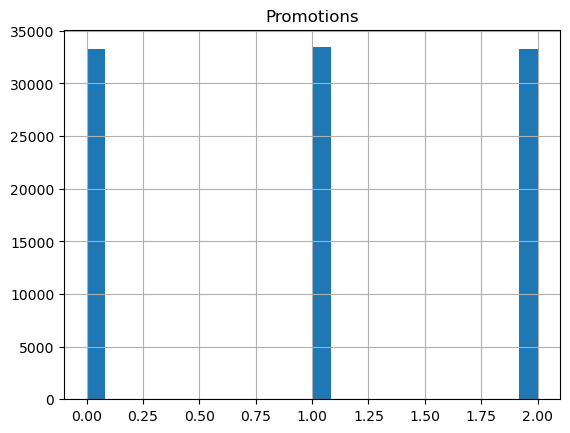

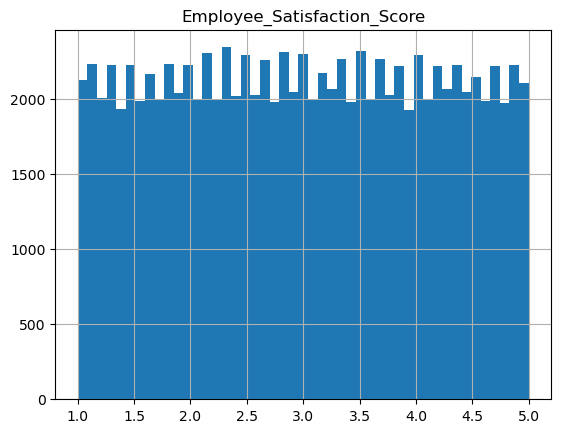

In [42]:
for col in num_cols:
    emp_df[col].hist(bins="auto")
    plt.title(col)
    plt.show()

In [43]:
obj_cols = list(emp_df.select_dtypes(include=["object"]).columns)

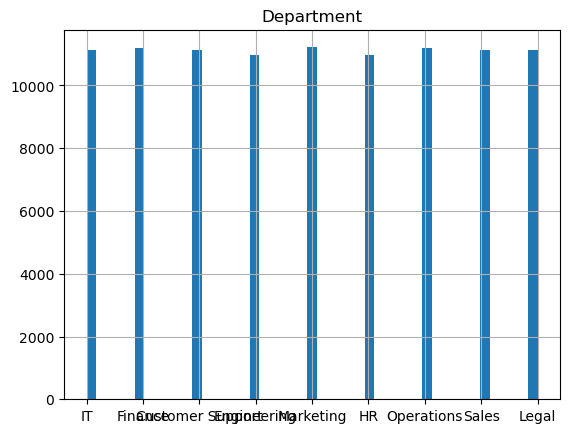

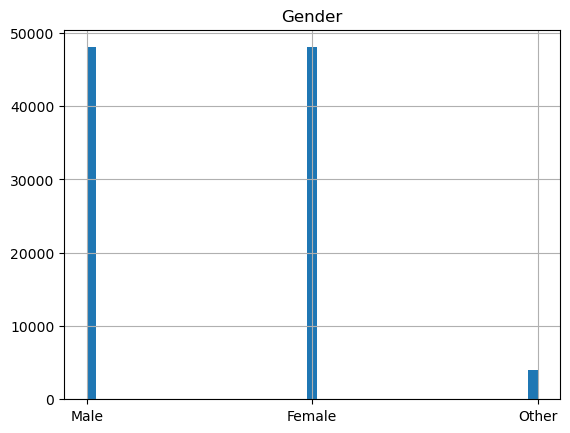

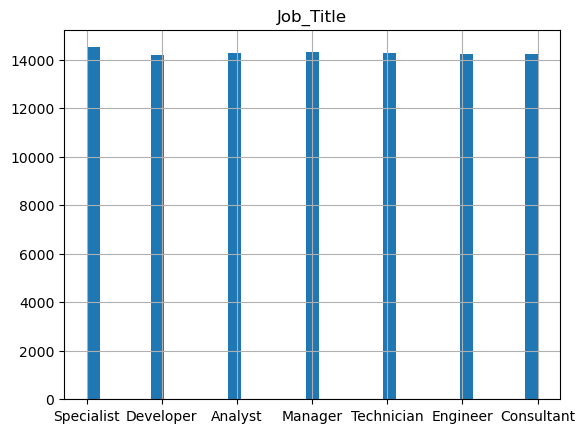

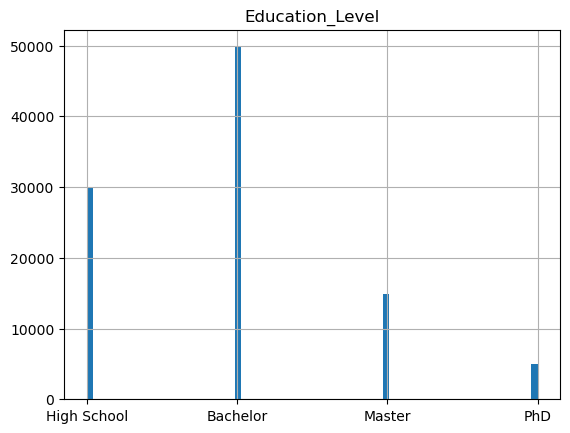

In [44]:
for col in obj_cols:
    emp_df[col].hist(bins="auto")
    plt.title(col)
    plt.show()

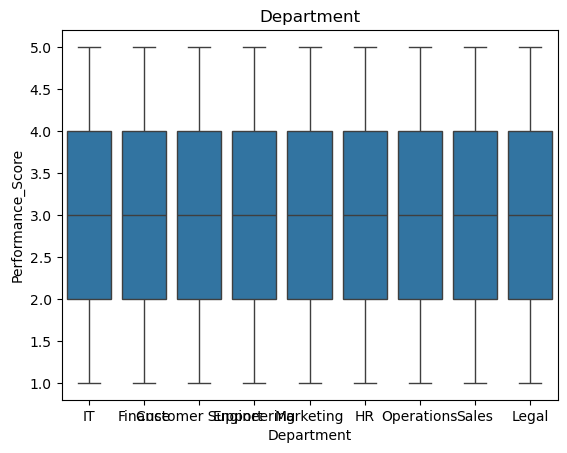

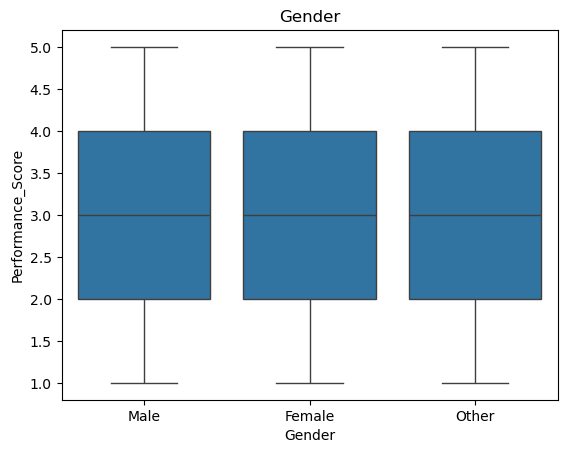

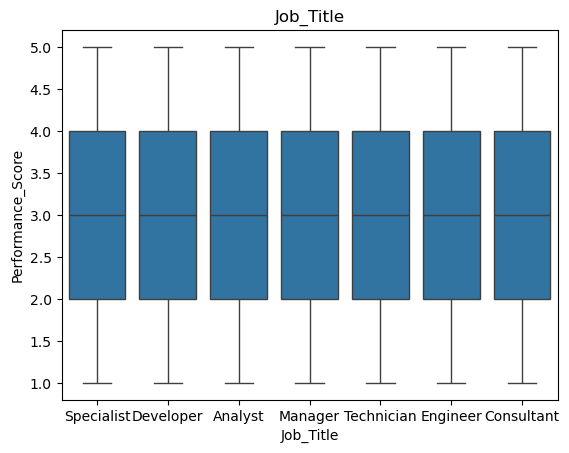

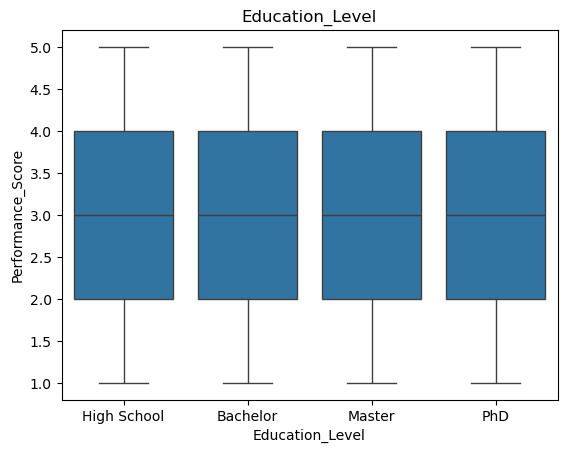

In [45]:
# Analyzing relationship between education level and years at
# # company with performance score or employee saistfaction

for col in obj_cols:
    sns.boxplot(data=emp_df, x=col, y="Performance_Score")
    plt.title(col)
    plt.show()

In [46]:
# check if we have null values
emp_df.isna().sum()

Department                        0
Gender                            0
Age                               0
Job_Title                         0
Hire_Date                         0
Years_At_Company                  0
Education_Level                 537
Performance_Score                 0
Monthly_Salary                 1000
Work_Hours_Per_Week               0
Projects_Handled                  0
Overtime_Hours                    0
Sick_Days                         0
Remote_Work_Frequency             0
Team_Size                         0
Training_Hours                    0
Promotions                        0
Employee_Satisfaction_Score       0
Resigned                          0
dtype: int64

### What do we want to do with the null values? / How did you handle the null in that col?

In [47]:
emp_df["Education_Level"] = emp_df["Education_Level"].fillna(emp_df["Education_Level"].value_counts().index[0])

# emp_df["Education_Level"] = emp_df["Education_Level"].fillna("Bachelor")


<Axes: >

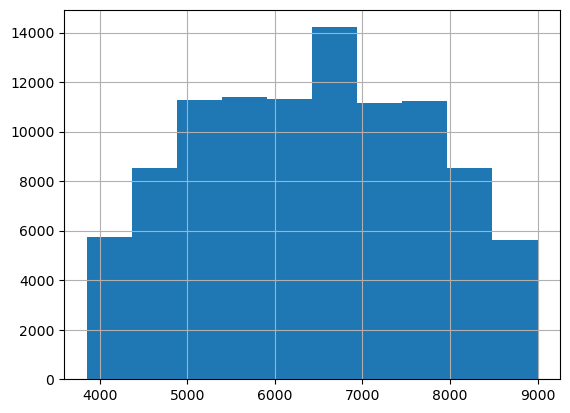

In [48]:
emp_df["Monthly_Salary"].hist()

In [49]:
# Because our data is quite normal, we can fill in the nulls in
# monthly salary as the mean

salary_means = emp_df.groupby(by="Job_Title")["Monthly_Salary"].mean()
salary_means

Job_Title
Analyst       5196.117330
Consultant    7152.385863
Developer     6489.641916
Engineer      7799.274899
Manager       7798.010722
Specialist    5854.600139
Technician    4544.386746
Name: Monthly_Salary, dtype: float64

In [50]:
def map_function(row):
    if pd.isnull(row["Monthly_Salary"]):
        row["Monthly_Salary"] = salary_means[row["Job_Title"]]
    else:
        row["Monthly_Salary"] = row["Monthly_Salary"]

In [51]:
emp_df.apply(map_function, axis=1)

Employee_ID
1         None
2         None
3         None
4         None
5         None
          ... 
99996     None
99997     None
99998     None
99999     None
100000    None
Length: 100000, dtype: object

In [52]:
# alternative way of writing out the mapper function
# emp_df["Monthly_Salary"] = emp_df.apply(lambda row: salary_means[row["Job_Title"]] if pd.isnull(row["Monthly_Salary"]) else row["Monthly_Salary"])

In [53]:
# Using conditions is quite granular and annoying, having to
# create conditions for each value

# conditions = [emp_df["Job_Title"]]

In [1]:
emp_df.head()

NameError: name 'emp_df' is not defined

In [55]:
emp_df.to_csv("data/cleaned_emp.csv")